In [2]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.datasets import CIFAR10
from torchvision.datasets import MNIST

In [3]:
def conv3x3(in_channels, out_channels, stride = 1):
    return nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1, bias = False)

In [4]:
class adamsnet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(adamsnet, self).__init__()
        
        self.k1 = torch.nn.Parameter(torch.Tensor(1).uniform_(0.0, 1.0))
        self.k2 = torch.nn.Parameter(torch.Tensor(1).uniform_(0.0, 1.0))
        self.k3 = torch.nn.Parameter(torch.Tensor(1).uniform_(0.0, 1.0))
        self.k4 = torch.nn.Parameter(torch.Tensor(1).uniform_(0.0, 1.0))
        self.k5 = torch.nn.Parameter(torch.Tensor(1).uniform_(0.0, 1.0))
        self.k6 = torch.nn.Parameter(torch.Tensor(1).uniform_(0.0, 1.0))
        self.k7 = torch.nn.Parameter(torch.Tensor(1).uniform_(0.0, 1.0))
        self.k8 = torch.nn.Parameter(torch.Tensor(1).uniform_(0.0, 1.0))
        
        self.MaxPool = nn.MaxPool2d(2, 2)
        
        self.conv1x1_residual2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 1)
        self.conv1x1_residual4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 1)
        self.conv1x1_residual6 = nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 1)
        
           
            
            
        
        self.conv0 = nn.Conv2d(in_channels, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        
    
        self.conv1 = conv3x3(in_channels = 64, out_channels = 64, stride = 1)
        self.bn1 = nn.BatchNorm2d(64)
        
        self.conv2 = conv3x3(in_channels = 64, out_channels = 64, stride = 1)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = conv3x3(in_channels = 64, out_channels = 64, stride = 1)
        self.bn3 = nn.BatchNorm2d(64)        

        self.conv4 = conv3x3(in_channels = 64, out_channels = 64, stride = 1)
        self.bn4 = nn.BatchNorm2d(64)
        
        self.conv5 = conv3x3(in_channels = 64, out_channels = 128, stride = 2)
        self.bn5 = nn.BatchNorm2d(64)
        
        self.conv6 = conv3x3(in_channels = 128, out_channels = 128, stride = 1)
        self.bn6 = nn.BatchNorm2d(128)
        
        self.conv7 = conv3x3(in_channels = 128, out_channels = 128, stride = 1)
        self.bn7 = nn.BatchNorm2d(128)
        
        self.conv8 = conv3x3(in_channels = 128, out_channels = 128, stride = 1)
        self.bn8 = nn.BatchNorm2d(128)
        
        self.conv9 = conv3x3(in_channels = 128, out_channels = 256, stride = 2)
        self.bn9 = nn.BatchNorm2d(128)
        
        self.conv10 = conv3x3(in_channels = 256, out_channels = 256, stride = 1)
        self.bn10 = nn.BatchNorm2d(256)
        
        self.conv11 = conv3x3(in_channels = 256, out_channels = 256, stride = 1)
        self.bn11 = nn.BatchNorm2d(256)
        
        self.conv12 = conv3x3(in_channels = 256, out_channels = 256, stride = 1)
        self.bn12 = nn.BatchNorm2d(256)
        
        self.conv13 = conv3x3(in_channels = 256, out_channels = 512, stride = 2)
        self.bn13 = nn.BatchNorm2d(256)
        
        self.conv14 = conv3x3(in_channels = 512, out_channels = 512, stride = 1)
        self.bn14 = nn.BatchNorm2d(512)
        
        self.conv15 = conv3x3(in_channels = 512, out_channels = 512, stride = 1)
        self.bn15 = nn.BatchNorm2d(512)
               
        self.conv16 = conv3x3(in_channels = 512, out_channels = 512, stride = 1)
        self.bn16 = nn.BatchNorm2d(512)
        
        
        self.AvgPool = nn.AvgPool2d(4)
        
        self.classifier = nn.Linear(512, num_classes)
                
                
    def forward(self, x):
        h = 0.1
        
        
        
        out = self.conv0(x)
        out_conv0 = out

        
        
        out = self.bn1(out)
        out = F.relu(out)
        out = self.conv1(out)
        out = self.bn2(out)
        out = F.relu(out)
        out = self.conv2(out)
        out_conv2 = out
        out += out_conv0
        out = F.relu(out)
        out_residual1 = out


        
        out = self.bn3(out)
        out = F.relu(out)
        out = self.conv3(out)
        out = self.bn4(out)
        out = F.relu(out)
        out = self.conv4(out)
        out_conv4 = self.MaxPool(out)
        out_conv4 = self.conv1x1_residual2(out_conv4)
        out = h * (1.0 - self.k2) * out + out_residual1 + h * self.k2 * out_conv2
        out = F.relu(out)
        out_residual2 = self.MaxPool(out)
        out_residual2 = self.conv1x1_residual2(out_residual2)

        

        
        out = self.bn5(out)
        out = F.relu(out)
        out = self.conv5(out)
        out = self.bn6(out)
        out = F.relu(out)
        out = self.conv6(out)
        out_conv6 = out
        out = h * (1.0 - self.k3) * out + out_residual2 + h * self.k3 * out_conv4
        out = F.relu(out)
        out_residual3 = out


        
        out = self.bn7(out)
        out = F.relu(out)
        out = self.conv7(out)
        out = self.bn8(out)
        out = F.relu(out)
        out = self.conv8(out)
        out_conv8 = self.MaxPool(out)
        out_conv8 = self.conv1x1_residual4(out_conv8)
        out = h*(1.0-self.k4)*out + out_residual3 + h*self.k4*out_conv6
        out = F.relu(out)
        out_residual4 = self.MaxPool(out)
        out_residual4 = self.conv1x1_residual4(out_residual4)
        


        
        out = self.bn9(out)
        out = F.relu(out)
        out = self.conv9(out)
        out = self.bn10(out)
        out = F.relu(out)
        out = self.conv10(out)
        out_conv10 = out
        out = h*(1.0-self.k5)*out + out_residual4 + h*self.k5*out_conv8
        out = F.relu(out)
        out_residual5 = out


        out = self.bn11(out)
        out = F.relu(out)
        out = self.conv11(out)
        out = self.bn12(out)
        out = F.relu(out)
        out = self.conv12(out)
        out_conv12 = self.MaxPool(out)
        out_conv12 = self.conv1x1_residual6(out_conv12)
        out = h*(1.0-self.k6)*out + out_residual5 + h*self.k6*out_conv10
        out = F.relu(out)
        out_residual6 = self.MaxPool(out)
        out_residual6 = self.conv1x1_residual6(out_residual6)


        
        out = self.bn13(out)
        out = F.relu(out)
        out = self.conv13(out)
        out = self.bn14(out)
        out = F.relu(out)
        out = self.conv14(out)
        out_conv14 = out
        out = h*(1.0-self.k7)*out + out_residual6 + h*self.k7*out_conv12
        out = F.relu(out)
        out_residual7 = out


        
        out = self.bn15(out)
        out = F.relu(out)
        out = self.conv15(out)
        out = self.bn16(out)
        out = F.relu(out)
        out = self.conv16(out)
        out_conv16 = out
        out = h*(1.0-self.k8)*out + out_residual7 + h*self.k8*out_conv14
        out = F.relu(out)


        out = self.AvgPool(out)

        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

In [5]:
# 测试
test_net = adamsnet(3, 10)
test_x = Variable(torch.zeros(1, 3, 32, 32))
test_y = test_net(test_x)
print('output: {}'.format(test_y.shape))

output: torch.Size([1, 10])


In [6]:
from datetime import datetime

import torch
import torch.nn.functional as F
from torch import nn
from torch.autograd import Variable


def get_acc(output, label):
    total = output.shape[0]
    _, pred_label = output.max(1)
    num_correct = (pred_label == label).sum().item()
    return num_correct / total


losses = []
acces = []
eval_losses = []
eval_acces = []


def train(net, train_data, test_data, num_epochs, optimizer, criterion):
    if torch.cuda.is_available():
        net = net.cuda()
    
    prev_time = datetime.now()
    
    
    
    for epoch in range(num_epochs):
        
        train_loss = 0
        train_acc = 0
        net = net.train()
        
        for im, label in train_data:
            if torch.cuda.is_available():
                im = Variable(im.cuda())  # (bs, 3, h, w)
                label = Variable(label.cuda())  # (bs, h, w)
            else:
                im = Variable(im)
                label = Variable(label)
            # forward
            output = net(im)
            loss = criterion(output, label)
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_acc += get_acc(output, label)
            
        losses.append(train_loss / len(train_data))
        acces.append(train_acc / len(train_data))

        cur_time = datetime.now()
        h, remainder = divmod((cur_time - prev_time).seconds, 3600)
        m, s = divmod(remainder, 60)
        time_str = "Time %02d:%02d:%02d" % (h, m, s)
            
        # 在测试集上检验效果
        eval_loss = 0
        eval_acc = 0
        net = net.eval()
        
        for im, label in test_data:  
            if torch.cuda.is_available():
                im = Variable(im.cuda())
                label = Variable(label.cuda())
            else:
                im = Variable(im)
                label = Variable(label)
                
            output = net(im)
            loss = criterion(output, label)
            
            eval_loss += loss.item()
            eval_acc += get_acc(output, label)
        
        eval_losses.append(eval_loss / len(test_data))
        eval_acces.append(eval_acc / len(test_data))
        
        epoch_str = (
                "Epoch %d. Train Loss: %f, Train Acc: %f, Eval Loss: %f, Eval Acc: %f, "
                % (epoch, train_loss / len(train_data),
                   train_acc / len(train_data), eval_loss / len(test_data),
                   eval_acc / len(test_data)))
        
        prev_time = cur_time
        print(epoch_str + time_str)

(32, 32, 3) classes: 7


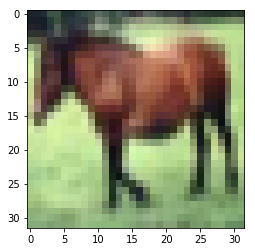

In [10]:
import matplotlib.pyplot as plt
train_set = CIFAR10('./cifar10', train = True, download = 0)
im, la = train_set[7]
print(np.array(im).shape,'classes:', la)
plt.imshow(im)

In [11]:
def data_tf(x):
    x = np.array(x, dtype = 'float32') / 255
    x = (x - 0.5) / 0.5 
    x = x.transpose((2, 0, 1)) 
    x = torch.from_numpy(x)
    # 加噪
    noise = torch.randn(x.size()) * 0.07
    x = x + Variable(noise, requires_grad = False)
    return x
     
train_set = CIFAR10('./cifar10', train = True, transform = data_tf, download = 0)
train_data = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle = True)
test_set = CIFAR10('./cifar10', train = False, transform = data_tf, download =  0)
test_data = torch.utils.data.DataLoader(test_set, batch_size = 128, shuffle = False)

net = adamsnet(3, 10)
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

classes: 7
torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


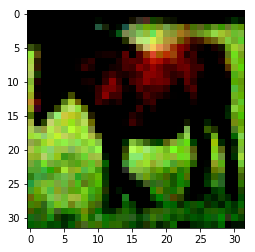

In [12]:
im, la = train_set[7]
print('classes:', la)
print(im.shape)
plt.imshow(np.array(im).transpose(1,2,0))

In [11]:
train(net, train_data, test_data, 20, optimizer, criterion)

Epoch 0. Train Loss: 1.382180, Train Acc: 0.496324, Eval Loss: 1.902685, Eval Acc: 0.414755, Time 00:00:43
Epoch 1. Train Loss: 0.903085, Train Acc: 0.676890, Eval Loss: 1.611683, Eval Acc: 0.532437, Time 00:00:47
Epoch 2. Train Loss: 0.682076, Train Acc: 0.759751, Eval Loss: 1.212074, Eval Acc: 0.653481, Time 00:00:46
Epoch 3. Train Loss: 0.526183, Train Acc: 0.816976, Eval Loss: 0.738932, Eval Acc: 0.750593, Time 00:00:47
Epoch 4. Train Loss: 0.396685, Train Acc: 0.860374, Eval Loss: 1.025009, Eval Acc: 0.690368, Time 00:00:47
Epoch 5. Train Loss: 0.289905, Train Acc: 0.899257, Eval Loss: 1.028426, Eval Acc: 0.688390, Time 00:00:47
Epoch 6. Train Loss: 0.206495, Train Acc: 0.928848, Eval Loss: 1.527208, Eval Acc: 0.641911, Time 00:00:47
Epoch 7. Train Loss: 0.152025, Train Acc: 0.948270, Eval Loss: 1.066767, Eval Acc: 0.725672, Time 00:00:47
Epoch 8. Train Loss: 0.110192, Train Acc: 0.962096, Eval Loss: 2.118329, Eval Acc: 0.576246, Time 00:00:47
Epoch 9. Train Loss: 0.084856, Train 

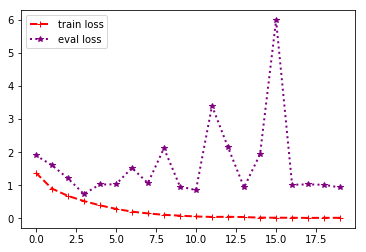

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(len(losses)), losses, color = 'red', linestyle = '--', 
         marker = '+', linewidth = '2', label = 'train loss' )
plt.plot(np.arange(len(eval_losses)), eval_losses, color = 'purple', linestyle = ':', 
         marker = '*', linewidth = '2', label = 'eval loss' )
plt.legend(loc = 'best')

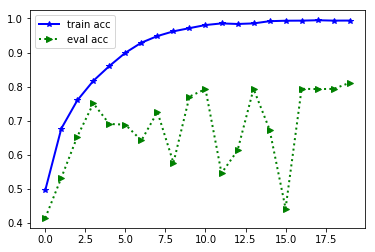

In [13]:
plt.plot(np.arange(len(acces)), acces, color = 'blue', linestyle = '-', 
         marker = '*', linewidth = '2', label = 'train acc' )
plt.plot(np.arange(len(eval_acces)), eval_acces, color = 'green', linestyle = ':', 
         marker = '>', linewidth = '2', label = 'eval acc' )
plt.legend(loc = 'best')